# Neural Networks

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [2]:
%run NN_Modules.ipynb

In [3]:
def sgd_momentum(x, dx, config, state):
    state.setdefault('old_grad', {})
    i = 0 
    for cur_layer_x, cur_layer_dx in zip(x,dx): 
        for cur_x, cur_dx in zip(cur_layer_x,cur_layer_dx):        
            cur_old_grad = state['old_grad'].setdefault(i, np.zeros_like(cur_dx))
            np.add(config['momentum'] * cur_old_grad, config['learning_rate'] * cur_dx, out = cur_old_grad)
            cur_x -= cur_old_grad
            i += 1     
            

def get_batches( (X, Y) , batch_size):
    n_samples = X.shape[0]
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        batch_idx = indices[start:end]
        yield X[batch_idx], Y[batch_idx]

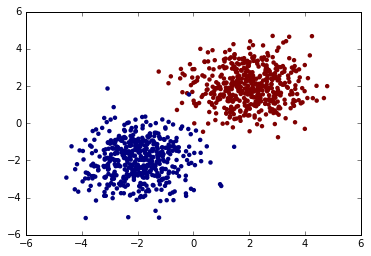

In [4]:
N = 500
X1 = np.random.randn(N,2) + np.array([2,2])
X2 = np.random.randn(N,2) + np.array([-2,-2])
Y = np.concatenate([np.ones(N),np.zeros(N)])[:,None]
Y = np.hstack([Y, 1-Y])
X = np.vstack([X1,X2])
plt.scatter(X[:,0],X[:,1], c = Y[:,0], edgecolors= 'none')
plt.show()

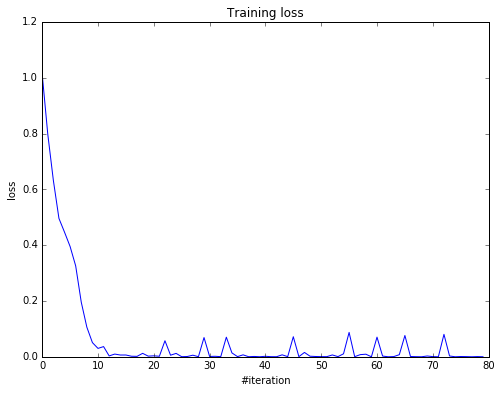

Current loss: 0.000169


In [5]:
criterion = ClassNLLCriterion()
#criterion = MSECriterion()
net = Sequential()
net.add(Linear(2, 4))
net.add(ReLU())
net.add(Linear(4, 2))
net.add(SoftMax())
print net

optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}
n_epoch = 10
batch_size = 128

loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches( (X,Y) , batch_size):
        
        net.zeroGradParameters()

        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)

        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)

        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        
        loss_history.append(loss)

    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)    

# Digit classification 

In [6]:
import os
from sklearn.datasets import fetch_mldata

# Fetch MNIST dataset and create a local copy.
if os.path.exists('mnist.npz'):
    with np.load('mnist.npz', 'r') as data:
        X = data['X']
        y = data['y']
else:
    mnist = fetch_mldata("mnist-original")
    X, y = mnist.data / 255.0, mnist.target
    np.savez('mnist.npz', X=X, y=y)

In [7]:
Y = np.zeros((y.shape[0], 10))
for i in range(y.shape[0]):
    Y[i][int(y[i])] = 1.

Current loss, ReLU: 0.334882
Current loss, ReLU: 0.210634
Current loss, ReLU: 0.255817
Current loss, ReLU: 0.170266
Current loss, ReLU: 0.137923
Current loss, ReLU: 0.135030
Current loss, ReLU: 0.111086
Current loss, ReLU: 0.121500
Current loss, ReLU: 0.105383
Current loss, ReLU: 0.095917
Current loss, ELU: 0.338323
Current loss, ELU: 0.264491
Current loss, ELU: 0.225375
Current loss, ELU: 0.191715
Current loss, ELU: 0.143453
Current loss, ELU: 0.144736
Current loss, ELU: 0.133514
Current loss, ELU: 0.125263
Current loss, ELU: 0.114671
Current loss, ELU: 0.101026
Current loss, LeakyReLU: 0.369498
Current loss, LeakyReLU: 0.305001
Current loss, LeakyReLU: 0.251327
Current loss, LeakyReLU: 0.196462
Current loss, LeakyReLU: 0.216385
Current loss, LeakyReLU: 0.158530
Current loss, LeakyReLU: 0.167004
Current loss, LeakyReLU: 0.114513
Current loss, LeakyReLU: 0.093031
Current loss, LeakyReLU: 0.132871
Current loss, SoftPlus: 0.363663
Current loss, SoftPlus: 0.291320
Current loss, SoftPlus: 

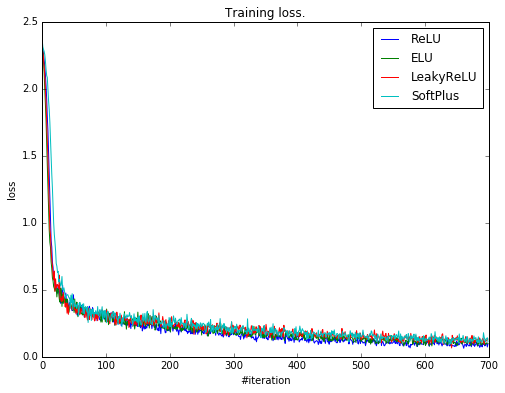

In [8]:
criterion = ClassNLLCriterion()
#criterion = MSECriterion()

net = Sequential()
net.add(Linear(784, 100))
net.add(ReLU())
net.add(Linear(100, 10))
net.add(SoftMax())

optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

n_epoch = 10
batch_size = 1000
plt.figure(figsize=(8, 6))
plt.title("Training loss.")
plt.xlabel("#iteration")
plt.ylabel("loss")

loss_history_relu = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches( (X,Y) , batch_size):
        net.zeroGradParameters()
        
        predictions = net.forward(x_batch)
        
        loss = criterion.forward(predictions, y_batch)
        
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)

        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        loss_history_relu.append(loss)
    print('Current loss, ReLU: %f' % loss)    
    
net = Sequential()
net.add(Linear(784, 100))
net.add(ELU(1.))
net.add(Linear(100, 10))
net.add(SoftMax())

loss_history_elu = []
for i in range(n_epoch):
    for x_batch, y_batch in get_batches( (X,Y) , batch_size):
        net.zeroGradParameters()
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        loss_history_elu.append(loss)
        
    print('Current loss, ELU: %f' % loss)    

net = Sequential()
net.add(Linear(784, 100))
net.add(LeakyReLU(0.3))
net.add(Linear(100, 10))
net.add(SoftMax())

loss_history_leaky = []
for i in range(n_epoch):
    for x_batch, y_batch in get_batches( (X,Y) , batch_size):
        net.zeroGradParameters()
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        loss_history_leaky.append(loss)
        
    print('Current loss, LeakyReLU: %f' % loss)

net = Sequential()
net.add(Linear(784, 100))
net.add(SoftPlus())
net.add(Linear(100, 10))
net.add(SoftMax())

loss_history_sp = []
for i in range(n_epoch):
    for x_batch, y_batch in get_batches( (X,Y) , batch_size):
        net.zeroGradParameters()
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        loss_history_sp.append(loss)
        
    print('Current loss, SoftPlus: %f' % loss)    
plt.plot(loss_history_relu)
plt.plot(loss_history_elu)
plt.plot(loss_history_leaky)
plt.plot(loss_history_sp)
plt.legend(('ReLU', 'ELU', 'LeakyReLU', 'SoftPlus'))
plt.show()


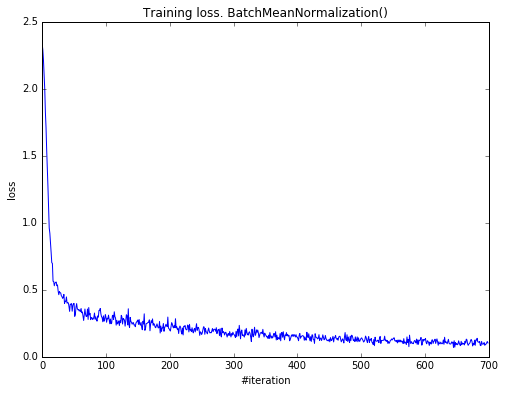

Current loss: 0.103359


In [9]:
net = Sequential()
net.add(Linear(784, 100))
net.add(BatchMeanNormalization())
net.add(ELU(1.))
net.add(Linear(100, 10))
net.add(SoftMax())
print net

optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

n_epoch = 10
batch_size = 1000

loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches( (X,Y) , batch_size):
        
        net.zeroGradParameters()
        
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        
        loss_history.append(loss)

    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss. BatchMeanNormalization()")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)    